## Xác định sự tương quan giữa các ``feature`` và đánh giá mức độ tác động cuả ``tổng số vote`` và ``rating`` đến ``doanh thu`` để khảo sát tính khả thi cho việc xây dựng mô hình dự đoán doanh thu phim
___

**Import libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Đọc dữ liệu trong file csv và lưu vào DataFrame tên là df**

In [ ]:
df=pd.read_csv('movies_data_processed.csv')

**áp dụng màu cho seaborn plot**

In [ ]:
sns.set_theme(style='dark') 

**Loại bỏ các variable không cần thiết cho việc đánh giá**

In [ ]:
variables=['url','ROI','result']
df_new=df.drop(variables,axis=1)


**Loại bỏ hàng bị thiếu dữ liệu để đánh giá**

In [9]:
df_filtered=df_new.dropna(subset=["gross","no_of_votes"])

In [11]:
numeric_cols=df_filtered.select_dtypes(include=['number'])
df_corr=numeric_cols.corr()
df_corr.style.background_gradient(cmap="Greens")

,rating,no_of_votes,meta_score,release_date,gross,budget
rating,1.000000,0.461577,0.698321,-0.239355,0.140119,-0.046567
no_of_votes,0.461577,1.000000,0.265823,0.011509,0.533907,0.306588
meta_score,0.698321,0.265823,1.000000,-0.181780,0.033720,-0.097297
release_date,-0.239355,0.011509,-0.181780,1.000000,0.165231,0.376250
gross,0.140119,0.533907,0.033720,0.165231,1.000000,0.708749
budget,-0.046567,0.306588,-0.097297,0.376250,0.708749,1.000000


**Tạo ma trận biểu diễn hệ số tương quan giữa các đặc trưng**

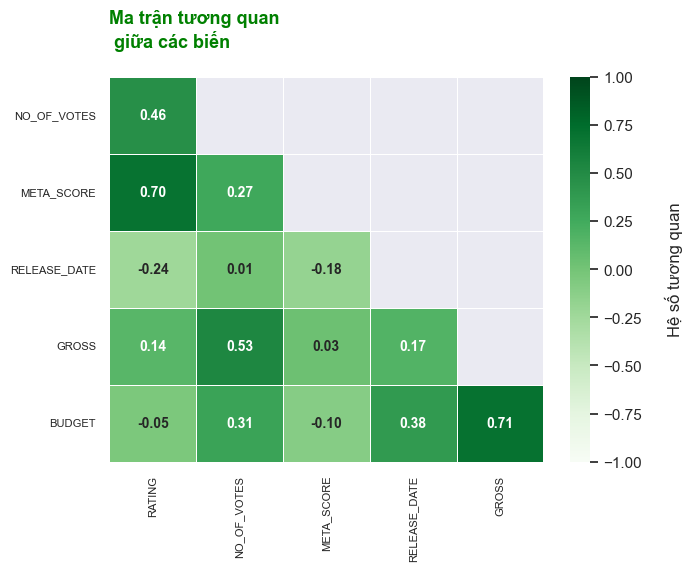

In [12]:
ones_corr=np.ones_like(df_corr,dtype=bool) #ma trận gồm các gía trị boolean có shape giống với data
mask=np.triu(ones_corr)# trả về ma trận tam giác trêntrên
adjusted_mask=mask[1:,:-1]
adjusted_df_corr=df_corr.iloc[1:,:-1]#bỏ hàng đầu tiên và cột cuối 

fig,ax=plt.subplots(figsize=(7,5))
# cmap=sns.diverging_palette(0,260.8,67.2,50.0,as_cmap=True)
sns.heatmap(data=adjusted_df_corr,mask=adjusted_mask,cmap="Greens",annot=True,annot_kws={"fontsize":10,"fontweight":'bold'},
            fmt='.2f',vmin=-1,vmax=1,linecolor='white',linewidths=0.7,    
            cbar_kws={"label": "\nHệ số tương quan"} )

yticks=[i.upper() for i in adjusted_df_corr.index]
xticks=[i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks,rotation=0,fontsize=8);
ax.set_xticklabels(xticks,rotation=90,fontsize=8);

title="Ma trận tương quan\n giữa các biến\n"
ax.set_title(title,loc='left',fontsize=13,fontweight='bold',color='green');

***ĐÁNH GIÁ***

- **Sự tương quan giữa no_of_votes và gross:** Có sự tương quan cao với hệ số tương quan 0.53, điều này cho thấy rằng các phim có nhiều lượt bình chọn hơn sẽ có doanh thu cao hơn.
- **Sự tương quan giữa budget và gross:** Có sự tương quan cao với hệ số tương quan 0.71, điều này cho thấy rằng các phim có nhiều ngânn sách hơn sẽ có doanh thu cao hơn.
- **Sự tương quan giữa no_of_votes và rating:** Có sự tương quan cao với hệ số tương quan 0.46, điều này cho thấy rằng các phim có nhiều lượt bình chọn hơn sẽ có rating cao hơn.

___
*** Đánh giá Sự tương quan giữa No_of_vote( số lượt đánh giá) và Gross( doanh thu)**



**Import thư viện dùng để chuẩn hóa dữ liệu**

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

**Dùng regression plot của seaborn để thấy mối quan hệ giữa số lượt bình chọn và gross**

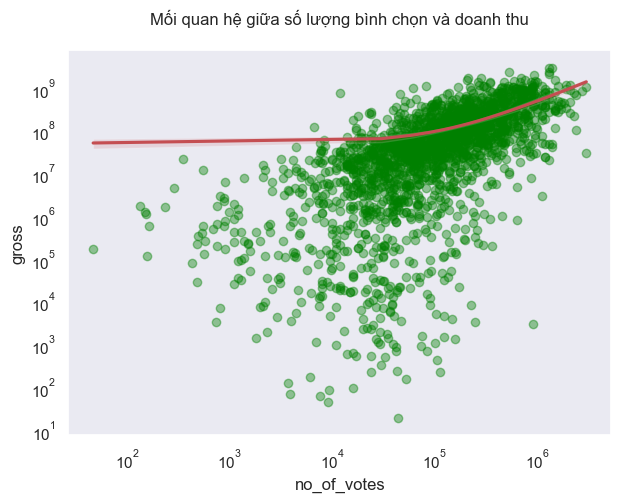

In [16]:
plt.figure(figsize=(7,5));
sns.regplot(
    data=df_filtered,
    x="no_of_votes",
    y="gross",
    color="green",
    line_kws=dict(color="r"),
    scatter_kws={"alpha": 0.4},
)
plt.xscale("log")
plt.yscale("log")
plt.title("Mối quan hệ giữa số lượng bình chọn và doanh thu\n");

***ĐÁNH GIÁ***
- **1. Mối quan hệ giữa "no_of_votes" và "gross":** Đồ thị cho thấy có một mối quan hệ dương giữa số lượng bình chọn và doanh thu, tức là khi số lượng bình chọn (no_of_votes) tăng, doanh thu (gross) có xu hướng tăng theo. Tuy nhiên, mối quan hệ này không hoàn toàn tuyến tính mà có xu hướng bão hòa ở phần trên của đồ thị, nghĩa là sau một mức độ nhất định, sự tăng trưởng doanh thu không còn mạnh mẽ như trước mặc dù số lượng bình chọn có thể tiếp tục tăng.
- **2. Sự phân tán của các điểm dữ liệu:** Các điểm dữ liệu có vẻ phân tán khá rộng, đặc biệt là ở phần dưới đồ thị, nơi số lượng bình chọn thấp. Điều này cho thấy rằng có sự biến động lớn về doanh thu đối với các bộ phim có số lượng bình chọn thấp.
- **3. Đường hồi quy (Red curve):** Đường hồi quy được vẽ trên đồ thị có dạng cong, cho thấy mô hình hồi quy đã điều chỉnh để phản ánh sự không hoàn toàn tuyến tính của dữ liệu. Tuy nhiên, độ dốc của đường hồi quy bắt đầu giảm dần khi số lượng bình chọn cao hơn, cho thấy sự bão hòa trong mối quan hệ giữa số lượng bình chọn và doanh thu ở mức độ cao hơn.


___
***Đánh giá số lượt vote của mỗi thể loại**

In [ ]:
import os

directory = "crawl/links"

# Lấy danh sách tên file (không bao gồm phần mở rộng) trong thư mục
txt_files = [os.path.splitext(file)[0] for file in os.listdir(directory) if file.endswith(".txt")]

txt_files


['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [11]:
df["filtered_genres"] = df["genres"].apply(
    lambda x: ", ".join([genre for genre in txt_files if genre.lower() in x.lower()])
)

In [ ]:
df = df[df["filtered_genres"].notna() & (df["filtered_genres"] != "")]
df["filtered_genres_list"] = df["filtered_genres"].str.split(", ")

df_exploded = df.explode("filtered_genres_list")

genre_votes = df_exploded.groupby("filtered_genres_list", as_index=False)[
    "no_of_votes"
].sum()

In [13]:
genre_votes = genre_votes.rename(columns={"filtered_genres_list": "genre"})
genre_votes = genre_votes.sort_values(by="no_of_votes", ascending=False)

genre_votes

,genre,no_of_votes
7,Drama,335922427.0
1,Adventure,190876356.0
0,Action,177283327.0
4,Comedy,171011268.0
20,Thriller,142136480.0
17,Sci-Fi,125999090.0
5,Crime,108174617.0
9,Fantasy,106542947.0
14,Mystery,81527326.0
16,Romance,79238995.0


**Tạo bar plot biểu diễn số lượt bình chọn của mỗi thể loại**

C:\Users\pc\AppData\Local\Temp\ipykernel_8024\467216628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_votes, x="genre", y="no_of_votes", palette="magma")


Text(0, 0.5, 'Thể loại')

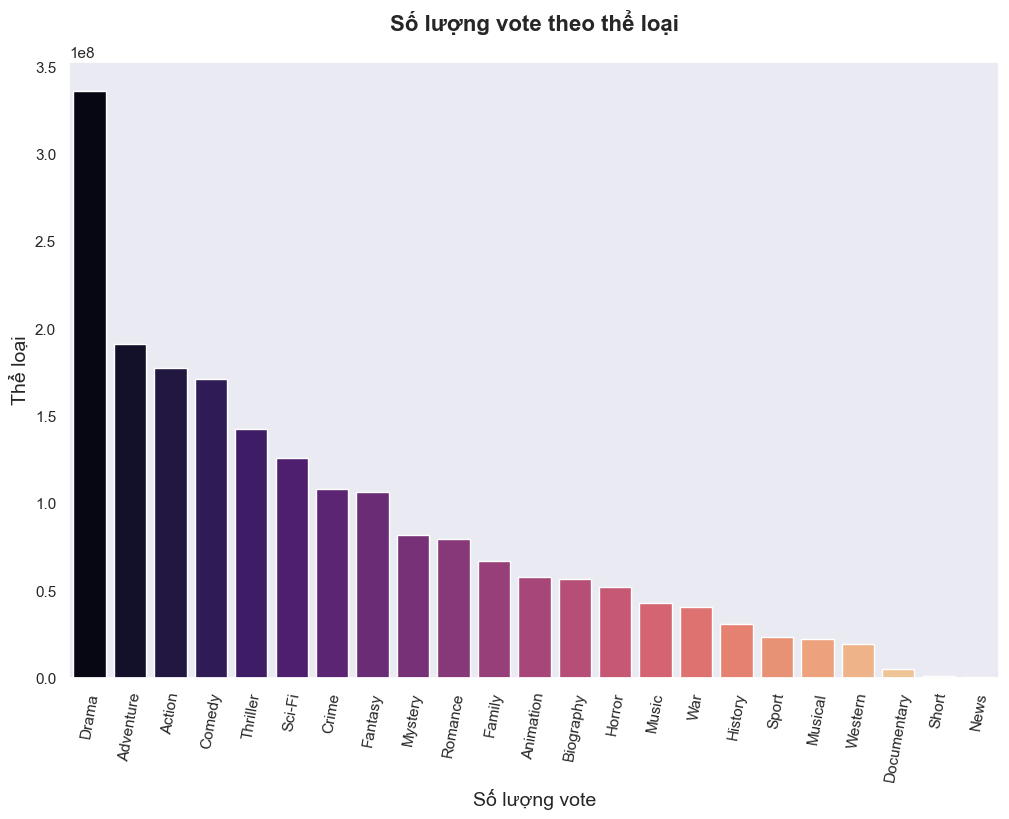

In [ ]:
plt.figure(figsize=(12, 8))


sns.barplot(data=genre_votes, x="genre", y="no_of_votes", palette="magma")


plt.title("Số lượng vote theo thể loại\n", fontsize=16, fontweight="bold")

plt.xticks(rotation=80)

plt.xlabel("Thể loại", fontsize=14)


plt.ylabel("Số lượng vote", fontsize=14)


***ĐÁNH GIÁ***
- **1. Thể loại phổ biến nhất:** "Drama" (Tâm lý) có số lượng vote lớn nhất, vượt xa các thể loại khác, với hơn 3 triệu lượt vote. Điều này cho thấy thể loại phim này được yêu thích và nhận được sự quan tâm đặc biệt từ khán giả.
- **2. Thể loại ít được vote:** Ở phần cuối của đồ thị, ta thấy các thể loại như "News", "Short" , "Western" , và "Documentary" có số lượng vote thấp hơn rất nhiều. Điều này có thể chỉ ra rằng những thể loại này ít được khán giả quan tâm so với các thể loại giải trí như drama, hành động hay phiêu lưu.

___
**Tạo biểu đồ regression của seaborn để biểu diễn mối quan hệ giữa rating và gross

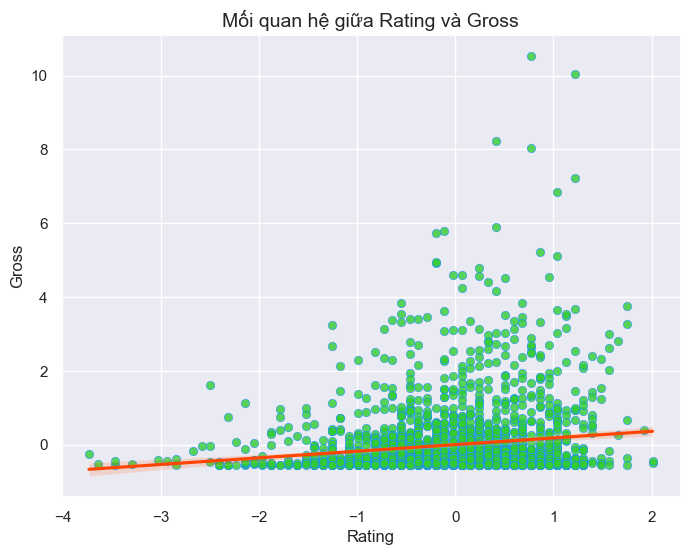

In [ ]:
# Chuẩn hóa dữ liệu
rating_gross_df = df[["rating", "gross"]]
scaler = StandardScaler()
df_scaled = rating_gross_df.copy()
df_scaled[["rating", "gross"]] = scaler.fit_transform(
    rating_gross_df[["rating", "gross"]]
)

plt.figure(figsize=(8, 6))
sns.regplot(
    x="rating",
    y="gross",
    data=df_scaled,
    color="#32CD32", 
    line_kws={"color": "#FF4500"},  
    scatter_kws={
        "edgecolor": "#1E90FF",
        "linewidths": 0.5,  
    }, 
)
plt.title("Mối quan hệ giữa Rating và Gross", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Gross", fontsize=12)
plt.grid(True)
plt.show()

***ĐÁNH GIÁ***
- **1. Mối quan hệ tích cực giữa Rating và Gross:** Đồ thị cho thấy một mối quan hệ tích cực giữa Rating và Gross. Khi Rating (đánh giá) tăng, doanh thu (Gross) cũng có xu hướng tăng theo. Điều này có thể hiểu là các bộ phim có đánh giá cao hơn có khả năng thu hút được nhiều khán giả hơn, dẫn đến doanh thu cao hơn.

- **2. Tính chất phân tán:** Dù có sự tương quan giữa Rating và Gross, nhưng dữ liệu khá phân tán. Có một số bộ phim có đánh giá thấp nhưng lại đạt doanh thu rất cao, trong khi một số bộ phim có đánh giá cao lại có doanh thu thấp. Điều này cho thấy yếu tố ngoài Rating, như chiến lược quảng bá, sự nổi tiếng, và các yếu tố khác cũng ảnh hưởng đến doanh thu.

- **3. Dự đoán yếu tố ngoài Rating:** ``Đường hồi quy`` cho thấy mối quan hệ giữa hai yếu tố này không phải là một đường thẳng hoàn hảo, mà có sự phân tán lớn xung quanh đường này. Điều này có thể chỉ ra rằng Rating chỉ đóng vai trò là một yếu tố trong việc xác định doanh thu, và còn rất nhiều yếu tố khác (như thể loại phim, số lượng phòng chiếu, độ phổ biến của các diễn viên) ảnh hưởng đến doanh thu.

- **4. Sự hiện diện của những ngoại lệ:** Một số điểm dữ liệu nằm rất xa khỏi đường hồi quy, cho thấy có những bộ phim có doanh thu rất cao hoặc thấp mặc dù Rating của chúng không tương xứng. Đây có thể là những bộ phim có sự nổi bật đặc biệt, như các phim bom tấn hoặc những phim có sự tham gia của các ngôi sao nổi tiếng.